# Solving Ordinary Differential Equations (ODEs)

In physics, the fundamental laws of nature are expressed as differential equations. Newton's second law, Maxwell's equations, Schrödinger's equation - they all tell us how physical quantities *change* rather than what they *are*. When you write $F = ma = m\frac{dv}{dt}$, you're not directly finding the velocity $v(t)$ - you're finding how velocity changes with time.

In your calculus courses, you learned analytical techniques for solving simple differential equations. But the vast majority of physics problems cannot be solved with pencil and paper. Real-world differential equations are:
- **Nonlinear** - Air resistance proportional to $v^2$, not $v$
- **Coupled** - Multiple variables affecting each other simultaneously  
- **Complex** - No closed-form solution exists

This is where *numerical methods* become essential. Instead of finding an exact formula $y(t)$, we'll compute approximate values at discrete time points: $y(t_0), y(t_1), y(t_2), \ldots$

## Why Numerical ODE Solvers Matter in Physics

Differential equations appear throughout physics:
- **Classical Mechanics**: Projectile with air resistance, planetary orbits, coupled oscillators
- **Thermodynamics**: Heat transfer, cooling and heating processes
- **Electromagnetism**: RC/RL/RLC circuits, electromagnetic wave propagation
- **Quantum Mechanics**: Time evolution of wave functions (Schrödinger equation)
- **Fluid Dynamics**: Weather prediction, ocean currents, aerodynamics
- **Population Dynamics**: Epidemiology, predator-prey systems, chemical reactions

For example, a simple pendulum has the equation:
$$\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin\theta = 0$$

For small angles, $\sin\theta \approx \theta$ and we can solve it analytically. But for large swings, the nonlinearity $\sin\theta$ makes analytical solutions impossible. Numerical methods handle both cases with equal effort.

## Connection to Previous Material

**From Numerical Differentiation**: Remember how we approximated derivatives using finite differences?
$$\frac{dy}{dx} \approx \frac{y(x+h) - y(x)}{h}$$

That was our starting point: given a function, find its derivative.

**From Numerical Integration**: We learned to compute:
$$\int_a^b f(x)dx \approx \sum_{i=1}^N w_i f(x_i)$$

That took us from a rate of change to accumulated quantity.

**Now with ODEs**: We're solving the *inverse problem* of differentiation:
$$\text{Given: } \frac{dy}{dx} = f(x,y) \quad \text{Find: } y(x)$$

We know how $y$ changes, and we want to reconstruct $y$ itself. It's like integration, but more complex because the rate of change $f$ can depend on both $x$ *and* $y$.

## The General First-Order ODE

We'll focus on *first-order ordinary differential equations*:
$$\frac{dy}{dx} = f(x, y)$$

where:
- $y$ is the *dependent variable* (what we're solving for)
- $x$ is the *independent variable* (typically time in physics)
- $f(x,y)$ is the *derivative function* or rate of change

We also need an initial condition: $y(x_0) = y_0$. This tells us where to start.

**Key insight**: Higher-order equations can always be rewritten as systems of first-order equations. For example:
$$\frac{d^2y}{dx^2} = f(x, y, \frac{dy}{dx})$$

can be rewritten as:
$$\frac{dy}{dx} = v, \quad \frac{dv}{dx} = f(x, y, v)$$

So once we learn to solve first-order equations, we can handle any higher order differential equation.

## Our Approach

We'll develop three key methods, each building on the previous:

1. **Euler's Method** - The simplest approach, extending our finite difference ideas
2. **Runge-Kutta Methods** - More sophisticated, achieving better accuracy
3. **Systems of ODEs** - Handling multiple coupled equations simultaneously

Along the way, we'll use **Newton's Law of Cooling** as our primary example because:
- It has physical meaning (temperature of cooling coffee!)
- The math is straightforward enough to see what's happening
- We can compare to the exact solution to verify our methods
- It introduces the key concepts without overwhelming complexity

Then we'll tackle a more complex example: the **Predator-Prey System** (foxes and rabbits), which demonstrates how coupled nonlinear equations produce rich, oscillatory behavior that emerges naturally from simple rules.

Finally, we'll see how Python's `scipy` library provides professional-grade ODE solvers that build on these same fundamental ideas.

## The Fundamental Strategy: Discretization

All numerical ODE methods follow the same basic strategy:
We'll replace derivatives with **finite differences**:
$$\frac{dy}{dx} \approx \frac{\Delta y}{\Delta x} = \frac{y_{n+1} - y_n}{x_{n+1} - x_n}$$

This converts the differential equation into an **update rule**: starting from $y_n$, how do we compute $y_{n+1}$?

Different methods use different update rules, trading off:
- **Accuracy** - How close to the true solution?
- **Stability** - Does the error grow or stay bounded?
- **Computational cost** - How many function evaluations per step?

**Good news**: Unlike numerical differentiation (which amplifies noise), ODE solvers tend to be stable. Small errors in one step don't necessarily ruin the entire solution. The integration-like nature of solving ODEs has a smoothing effect.

Let's begin with the simplest method: Euler's Method.

---

# Euler’s method

Euler's method is the simplest numerical approach to solving ODEs, and it builds directly on the concept of **finite differences** from numerical differentiation.

The key insight: If we know $y$ at some point $x_n$, and we know the derivative $\frac{dy}{dx} = f(x,y)$, we can approximate $y$ at the next point $x_{n+1}$ by assuming the derivative stays constant over a small interval.

Starting from the definition of a derivative:
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{y(x + \Delta x) - y(x)}{\Delta x}$$

For a **small but finite** $\Delta x$, we approximate:
$$\frac{dy}{dx} \approx \frac{y_{n+1} - y_n}{\Delta x}$$

Since we know that $\frac{dy}{dx} = f(x_n, y_n)$, we can rearrange to find:
$$y_{n+1} - y_n \approx f(x_n, y_n) \Delta x$$

This gives us the **Euler method update formula**:
$$\boxed{y_{n+1} = y_n + f(x_n, y_n) \Delta x}$$

**Geometric interpretation**: At each point, we follow the tangent line (whose slope is $f(x_n, y_n)$) for a small distance $\Delta x$. Then we recalculate the slope and take another small step. We're essentially "walking along the tangent lines."

### Understanding the Error

**Local Error**: Each step introduces an error of order $O(\Delta x^2)$ because we're using a first-order Taylor approximation (keeping only the linear term).

**Global Error**: After $N$ steps covering a total interval, the accumulated error grows to $O(\Delta x)$. This means:
- To cut the error in half, you need to **halve the step size**
- To get 10× better accuracy, you need **10× more steps**

This linear error growth is why Euler's method, while simple to understand and implement, is not always the best choice for serious computation. But it's the starting point that gets us further than you would think.

---

## Example: Newton's Law of Cooling

Let's apply Euler's method to a real physics problem: **Newton's Law of Cooling**.

### The Physics

When an object's temperature differs from its surroundings by a moderate amount, the rate of temperature change is proportional to the temperature difference:

$$\frac{dT}{dt} = -r(T - T_s)$$

where:
- $T(t)$ is the object's temperature at time $t$
- $T_s$ is the surrounding (ambient) temperature
- $r$ is the *cooling constant* (units: 1/time)

**Physical interpretation**:
- The minus sign: If $T > T_s$, then $\frac{dT}{dt} < 0$ (temperature decreases)
- If $T < T_s$, then $\frac{dT}{dt} > 0$ (temperature increases - warming!)
- At equilibrium $T = T_s$, we get $\frac{dT}{dt} = 0$ (no change)

The cooling constant $r$ depends on:
- Surface area exposed to air
- Thermal conductivity of the object
- Heat capacity (specific heat × mass)
- Air flow conditions

### The Set Up
Let's consider a cup of coffee (initially 90°C) cooling in a room (20°C) with $r \approx 0.1$ per minute.

In [2]:
import numpy as np
from matplotlib import pyplot

# Physical parameters
T0 = 90.0    # initial temperature (°C) - hot coffee
Ts = 20.0    # ambient temperature (°C) - room temperature
r = 0.1      # cooling rate (1/min)

# Numerical parameters
dt = 0.05    # time step (minutes)
tmax = 60.0  # simulate for 1 hour
nsteps = int(tmax/dt)  # number of time steps

With a straight forward implementation:

In [3]:
T = T0  # Current temperature starts at T0

# Time-stepping loop
for i in range(nsteps):
    # Calculate the derivative at current state
    dT_dt = -r * (T - Ts)
    
    # Euler step: T_new = T_old + (dT/dt)*dt
    T = T + dT_dt * dt
    
    # Print some values to see what's happening
    if i % 200 == 0:  # Every 10 minutes (200 steps × 0.05 min/step)
        print(f"t = {i*dt:5.1f} min,  T = {T:6.2f} °C")

t =   0.0 min,  T =  89.65 °C
t =  10.0 min,  T =  45.56 °C
t =  20.0 min,  T =  29.38 °C
t =  30.0 min,  T =  23.44 °C
t =  40.0 min,  T =  21.26 °C
t =  50.0 min,  T =  20.46 °C


**What's happening here?**
1. We start with coffee at 90°C
2. Calculate how fast it's cooling right now: $dT/dt = -r(T - T_s)$
3. Use that rate to estimate the temperature after time $dt$
4. Repeat.

Let's plot the results. We create numpy arrays to store the (x,y) values 

In [4]:
# Create arrays to store results
my_time = np.linspace(0, tmax, nsteps)  # Time values
my_temp = np.zeros(nsteps)              # Temperature values

We have to rewrite the loop to store the values in the arrays. Remember that numpy arrays start from 0.

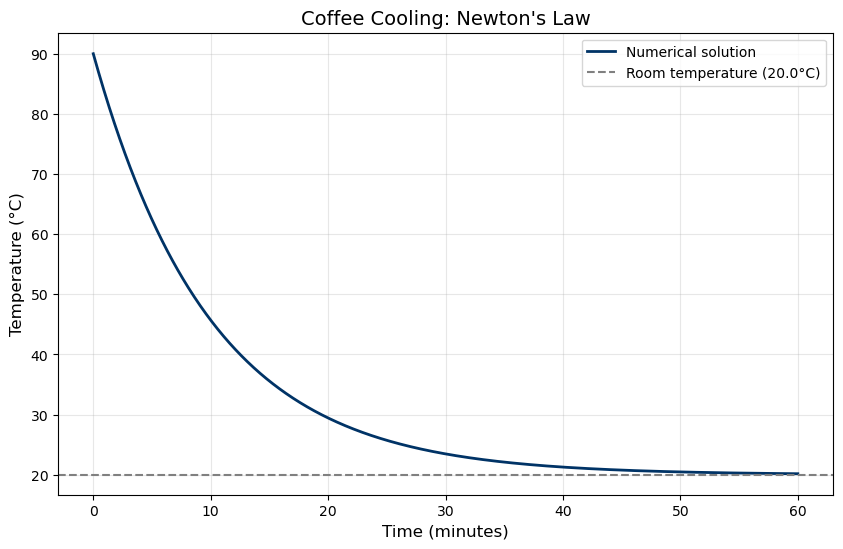

In [5]:
# Set initial condition
T = T0
my_temp[0] = T0  # Store initial temperature

# Time-stepping loop
for i in range(1, nsteps):
    dT_dt = -r * (T - Ts)
    T = T + dT_dt * dt
    my_temp[i] = T  # Store the new temperature

# Plot the results
pyplot.figure(figsize=(10, 6))
pyplot.plot(my_time, my_temp, color='#003366', linewidth=2, label='Numerical solution')
pyplot.axhline(y=Ts, color='gray', linestyle='--', label=f'Room temperature ({Ts}°C)')
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Temperature (°C)', fontsize=12)
pyplot.title("Coffee Cooling: Newton's Law", fontsize=14)
pyplot.grid(True, alpha=0.3)
pyplot.legend()
pyplot.show()

Alternatively, and in order to reuse code in future problems, we could have created a function.

In [7]:
def euler_step(y, f, t, dt):
    """
    Take one Euler method step for dy/dt = f(t, y)
    
    Parameters
    ----------
    y : float
        Current value of dependent variable
    f : function
        Right-hand side function f(t, y) that returns dy/dt
    t : float
        Current time (needed if f depends on t explicitly)
    dt : float
        Time step size
        
    Returns
    -------
    float
        Updated value y_new = y + f(t,y)*dt
    """
    return y + f(t, y) * dt

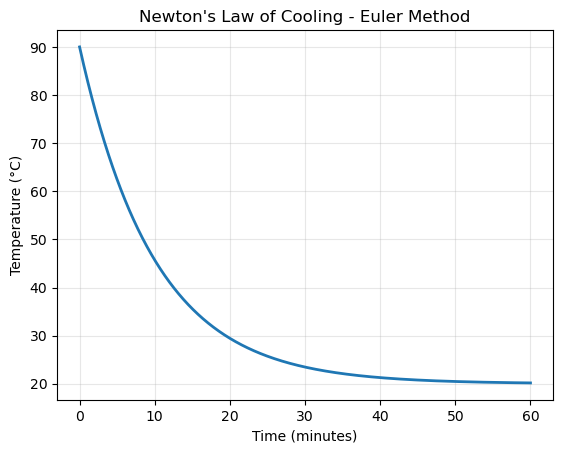

In [8]:
# Define the derivative function for Newton's cooling
def cooling_rate(t, T):
    """
    Rate of temperature change: dT/dt = -r(T - Ts)
    
    Parameters
    ----------
    t : float
        Time (not used in this equation, but included for consistency)
    T : float
        Current temperature
        
    Returns
    -------
    float
        Rate of change dT/dt
    """
    return -r * (T - Ts)

# Now solve using our Euler function
my_time = np.linspace(0, tmax, nsteps)
my_temp = np.zeros(nsteps)

T = T0
my_temp[0] = T0

for i in range(1, nsteps):
    t = my_time[i-1]
    T = euler_step(T, cooling_rate, t, dt)
    my_temp[i] = T

pyplot.plot(my_time, my_temp, linewidth=2)
pyplot.xlabel('Time (minutes)')
pyplot.ylabel('Temperature (°C)')
pyplot.title('Newton\'s Law of Cooling - Euler Method')
pyplot.grid(True, alpha=0.3)

Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="https://realpython.com/python-lambda/">here</a>).

In [9]:
# Define cooling rate as a lambda
cooling = lambda t, T: -r * (T - Ts)

# Use it directly in the loop
T = T0
my_temp[0] = T0
for i in range(1, nsteps):
    t = my_time[i-1]
    T = euler_step(T, cooling, t, dt)
    my_temp[i] = T

**When to use lambda vs regular functions?**
- *Lambda*: For one-line expressions you'll only use in one place
- *Regular function*: When you need documentation, multiple lines, or will reuse it


## Comparing with the Exact Solution

Newton's law of cooling has an analytical solution we can use to verify our numerical method: $$T(t) = T_s + (T_0 - T_s)e^{-rt}$$


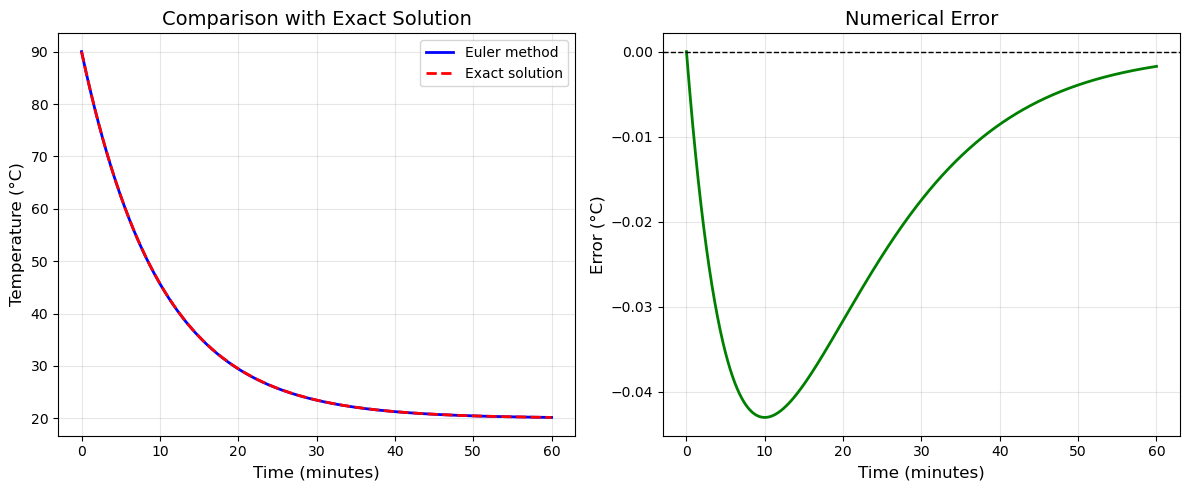

Maximum absolute error: 0.0430 °C
Maximum relative error: 0.1108%


In [10]:
def T_exact(t):
    return Ts + (T0 - Ts) * np.exp(-r * t)

# Compute exact solution
T_analytical = T_exact(my_time)

# Plot both solutions
pyplot.figure(figsize=(12, 5))

# Left plot: Both solutions
pyplot.subplot(1, 2, 1)
pyplot.plot(my_time, my_temp, 'b-', linewidth=2, label='Euler method')
pyplot.plot(my_time, T_analytical, 'r--', linewidth=2, label='Exact solution')
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Temperature (°C)', fontsize=12)
pyplot.title('Comparison with Exact Solution', fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3)

# Right plot: Error
pyplot.subplot(1, 2, 2)
error = my_temp - T_analytical
pyplot.plot(my_time, error, 'g-', linewidth=2)
pyplot.axhline(y=0, color='black', linestyle='--', linewidth=1)
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Error (°C)', fontsize=12)
pyplot.title('Numerical Error', fontsize=14)
pyplot.grid(True, alpha=0.3)

pyplot.tight_layout()
pyplot.show()

# Print maximum error
print(f"Maximum absolute error: {np.max(np.abs(error)):.4f} °C")
print(f"Maximum relative error: {np.max(np.abs(error/T_analytical)):.4%}")

**What to notice:**
- The Euler solution is very close to the exact solution
- The error is small but systematic (not random noise)
- For this time step (dt=0.05), the method works quite well

## Step Size Effects

How does the step size $\Delta t$ affect accuracy? Let's find out by solving the same problem with different step sizes:

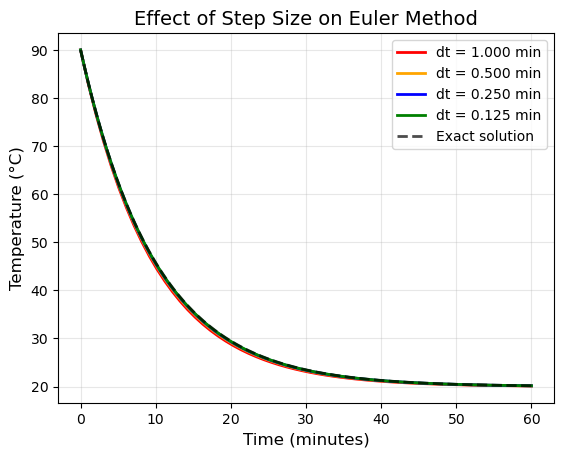

In [11]:
# Try four different step sizes
dt_values = [1.0, 0.5, 0.25, 0.125]  # Starting at 1 minute, halving each time
colors = ['red', 'orange', 'blue', 'green']

for dt, color in zip(dt_values, colors):
    nsteps = int(tmax / dt)
    my_time = np.linspace(0, tmax, nsteps)
    my_temp = np.zeros(nsteps)
    
    T = T0
    my_temp[0] = T0
    
    for i in range(1, nsteps):
        t = my_time[i-1]
        T = euler_step(T, cooling, t, dt)
        my_temp[i] = T
    
    pyplot.plot(my_time, my_temp, color=color, linewidth=2, 
                label=f'dt = {dt:.3f} min')

# Add exact solution for comparison
t_fine = np.linspace(0, tmax, 1000)
pyplot.plot(t_fine, T_exact(t_fine), 'k--', linewidth=2, 
            label='Exact solution', alpha=0.7)

pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Temperature (°C)', fontsize=12)
pyplot.title('Effect of Step Size on Euler Method', fontsize=14)
pyplot.legend(fontsize=10)
pyplot.grid(True, alpha=0.3)
pyplot.show()

Let's zoom in on the function to see difference.

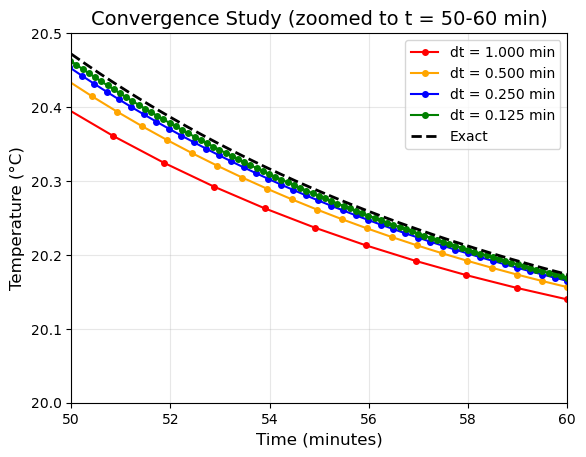

In [12]:
for dt, color in zip(dt_values, colors):
    nsteps = int(tmax / dt)
    my_time = np.linspace(0, tmax, nsteps)
    my_temp = np.zeros(nsteps)
    
    T = T0
    my_temp[0] = T0
    
    for i in range(1, nsteps):
        t = my_time[i-1]
        T = euler_step(T, cooling, t, dt)
        my_temp[i] = T
    
    pyplot.plot(my_time, my_temp, 'o-', color=color, markersize=4,
                label=f'dt = {dt:.3f} min')

t_fine = np.linspace(50, 60, 1000)  # Zoom to last 10 minutes
pyplot.plot(t_fine, T_exact(t_fine), 'k--', linewidth=2, label='Exact')

pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Temperature (°C)', fontsize=12)
pyplot.title('Convergence Study (zoomed to t = 50-60 min)', fontsize=14)
pyplot.xlim(50, 60)
pyplot.ylim(20,20.5)
pyplot.legend(fontsize=10)
pyplot.grid(True, alpha=0.3)
pyplot.show()

In [13]:
print("Step Size Analysis:")
print("-" * 60)
print(f"{'dt (min)':<12} {'# Steps':<10} {'Max Error (°C)':<15}")
print("-" * 60)

for dt in dt_values:
    nsteps = int(tmax / dt)
    my_time = np.linspace(0, tmax, nsteps)
    my_temp = np.zeros(nsteps)
    
    T = T0
    my_temp[0] = T0
    
    for i in range(1, nsteps):
        t = my_time[i-1]
        T = euler_step(T, cooling, t, dt)
        my_temp[i] = T
    
    error = np.abs(my_temp - T_exact(my_time))
    max_error = np.max(error)
    
    print(f"{dt:<12.3f} {nsteps:<10d} {max_error:<15.6f}")

Step Size Analysis:
------------------------------------------------------------
dt (min)     # Steps    Max Error (°C) 
------------------------------------------------------------
1.000        60         0.911281       
0.500        120        0.442053       
0.250        240        0.217768       
0.125        480        0.108086       


Remember, the Euler method...
- Requires small step sizes for good accuracy
- Error accumulates linearly with the number of steps
- Can be unstable for certain "stiff" equations
- Not the most efficient for production code

# Runge-Kutta methods

## The Problem with Euler's Method

Euler's method has a fundamental limitation: it uses the slope at the *beginning* of each interval to extrapolate across the entire interval. Look at what happens geometrically:


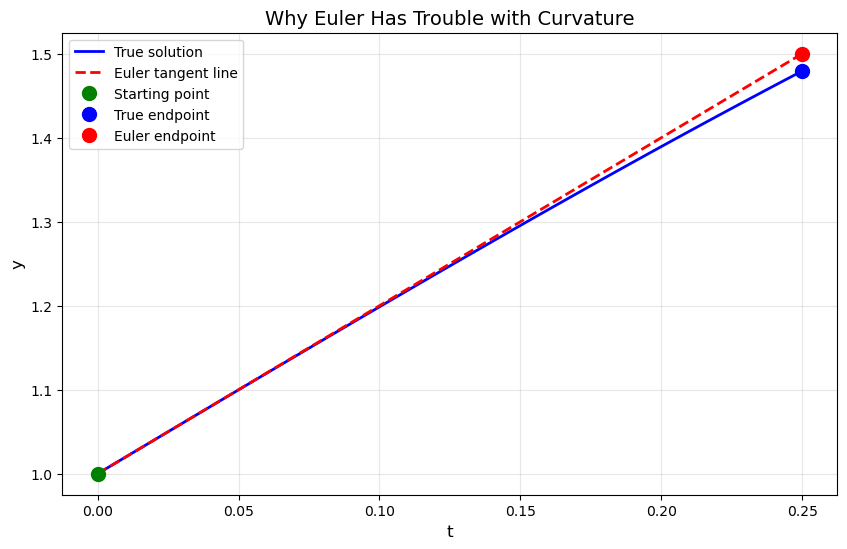

In [15]:
# Visualize Euler's limitation
import numpy as np
from matplotlib import pyplot

# A function that curves significantly
def exact_solution(t):
    return 1 + np.sin(2*t)

# Its derivative
def f(t, y):
    return 2*np.cos(2*t)

# One large Euler step
t0, y0 = 0, 1
dt = .25

t_curve = np.linspace(t0, t0 + dt, 100)
y_curve = exact_solution(t_curve)

# Euler's approximation: follow the tangent line
slope = f(t0, y0)
y_euler = y0 + slope * (t_curve - t0)

pyplot.figure(figsize=(10, 6))
pyplot.plot(t_curve, y_curve, 'b-', linewidth=2, label='True solution')
pyplot.plot(t_curve, y_euler, 'r--', linewidth=2, label='Euler tangent line')
pyplot.plot(t0, y0, 'go', markersize=10, label='Starting point')
pyplot.plot(t0 + dt, exact_solution(t0 + dt), 'bo', markersize=10, label='True endpoint')
pyplot.plot(t0 + dt, y0 + slope*dt, 'ro', markersize=10, label='Euler endpoint')
pyplot.xlabel('t', fontsize=12)
pyplot.ylabel('y', fontsize=12)
pyplot.title('Why Euler Has Trouble with Curvature', fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3)
pyplot.show()

**The key insight**: The tangent line at $t_0$ works well locally, but as we move away, the curvature of the actual solution makes the tangent line increasingly inaccurate. The error grows as the solution curves away from the tangent line.

**Question**: What if we could sample the slope at multiple points within the interval and use that extra information to better follow the curve?

That's exactly what Runge-Kutta methods do!

## Second-Order Runge-Kutta (RK2): The Midpoint Method

### The Intuition

Instead of using only the slope at the start, let's be smarter:
1. Take a **provisional half-step** using Euler's method to estimate $y$ at the midpoint
2. Evaluate the slope at this **midpoint**
3. Use this **midpoint slope** to take a full step from the original position

**Why is this better?** The midpoint slope is more representative of the average slope across the interval, especially if the function is curving.

**Connection to numerical integration**: Remember Simpson's Rule? It used function values at the endpoints AND the midpoint to fit a parabola. RK2 does something similar for ODEs - it samples the slope at the midpoint to capture curvature.

### The Mathematics

For $\frac{dy}{dt} = f(t, y)$, the RK2 (midpoint) formula is:

$$k_1 = \Delta t \cdot f(t_n, y_n)$$
$$k_2 = \Delta t \cdot f\left(t_n + \frac{\Delta t}{2}, y_n + \frac{k_1}{2}\right)$$
$$y_{n+1} = y_n + k_2$$

**Breaking it down**:
- $k_1$: The "Euler step" that estimates how far we'd go in time $\Delta t$
- $k_1/2$: Half of that step gets us to the midpoint
- $k_2$: The slope at the midpoint, scaled by $\Delta t$
- Final update: Use the midpoint slope for the full step

**Error**: RK2 has local error $O(\Delta t^3)$ and global error $O(\Delta t^2)$ - much better than Euler's $O(\Delta t)$!

In [16]:
def rk2_step(y, f, t, dt):
    """
    Take one RK2 (midpoint) step for dy/dt = f(t, y)
    
    Parameters
    ----------
    y : float
        Current value
    f : function
        Right-hand side function f(t, y)
    t : float
        Current time
    dt : float
        Time step
        
    Returns
    -------
    float
        Updated value using midpoint method
    """
    # Step 1: Compute slope at start
    k1 = dt * f(t, y)
    
    # Step 2: Use k1 to estimate y at midpoint, compute slope there
    k2 = dt * f(t + 0.5*dt, y + 0.5*k1)
    
    # Step 3: Use midpoint slope for full step
    return y + k2

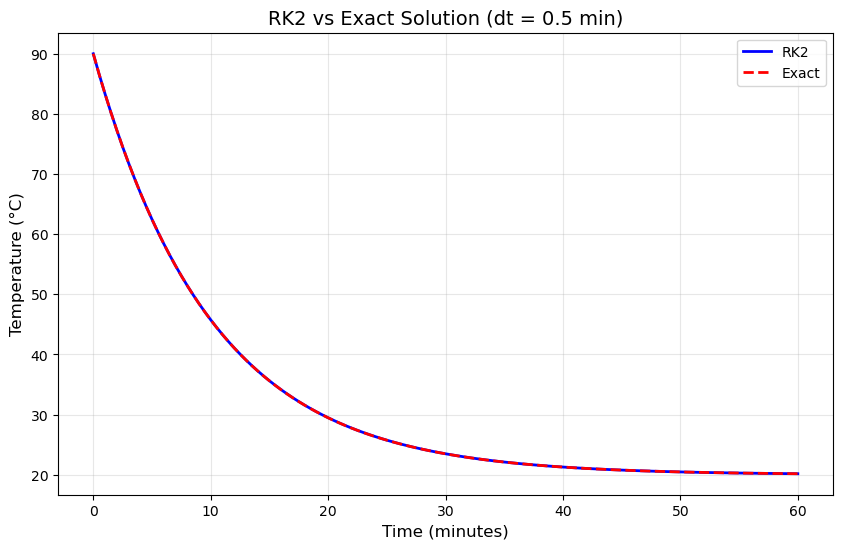

RK2 Maximum error: 0.011143 °C


In [18]:
T0 = 90.0
Ts = 20.0
r = 0.1
dt = 0.5  # Notice: we can use a LARGER step than with Euler
tmax = 60.0
nsteps = int(tmax/dt)+1

cooling = lambda t, T: -r*(T - Ts)

# Solve with RK2
my_time = np.arange(0, tmax + dt, dt) 
my_temp_rk2 = np.zeros(nsteps)

T = T0
my_temp_rk2[0] = T0

for i in range(1, nsteps):
    t = my_time[i-1]
    T = rk2_step(T, cooling, t, dt)
    my_temp_rk2[i] = T

# Compare with exact solution
T_exact = lambda t: Ts + (T0 - Ts)*np.exp(-r*t)

pyplot.figure(figsize=(10, 6))
pyplot.plot(my_time, my_temp_rk2, 'b-', linewidth=2, label='RK2')
pyplot.plot(my_time, T_exact(my_time), 'r--', linewidth=2, label='Exact')
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Temperature (°C)', fontsize=12)
pyplot.title('RK2 vs Exact Solution (dt = 0.5 min)', fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3)
pyplot.show()

# Check the error
error_rk2 = np.abs(my_temp_rk2 - T_exact(my_time))
print(f"RK2 Maximum error: {np.max(error_rk2):.6f} °C")

## Fourth-Order Runge-Kutta (RK4): The Gold Standard

### The Motivation

RK2 samples the slope at two points: start and midpoint. What if we sampled even more strategically?

**RK4 strategy**:
1. Evaluate slope at the **start** → gives $k_1$
2. Use $k_1$ to estimate slope at **first midpoint** → gives $k_2$  
3. Use $k_2$ (the improved midpoint estimate) to re-estimate slope at **second midpoint** → gives $k_3$
4. Use $k_3$ to estimate slope at the **end** → gives $k_4$
5. Take a **weighted average** of all four slopes, emphasizing the midpoint estimates

**Why this works**: By sampling multiple times and refining estimates, RK4 captures how the solution curves through the interval with remarkable accuracy.

**Historical note**: RK4 was developed by German mathematicians Runge (1895) and Kutta (1901). Despite being over 120 years old, it's still one of the most widely used numerical methods in science and engineering!

### The Mathematics

$$k_1 = \Delta t \cdot f(t_n, y_n)$$
$$k_2 = \Delta t \cdot f\left(t_n + \frac{\Delta t}{2}, y_n + \frac{k_1}{2}\right)$$
$$k_3 = \Delta t \cdot f\left(t_n + \frac{\Delta t}{2}, y_n + \frac{k_2}{2}\right)$$
$$k_4 = \Delta t \cdot f(t_n + \Delta t, y_n + k_3)$$
$$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

**Understanding the weights**:
- Start slope $k_1$ gets weight $\frac{1}{6}$
- Both midpoint slopes $k_2$ and $k_3$ get weight $\frac{2}{6} = \frac{1}{3}$ each
- End slope $k_4$ gets weight $\frac{1}{6}$

**Why double weight on midpoints?** The midpoint samples are more reliable estimates of the average behavior across the interval (similar to Simpson's Rule giving more weight to midpoint function values).

**Error**: RK4 has local error $O(\Delta t^5)$ and global error $O(\Delta t^4)$ - exceptionally accurate!

### Newton's Law of Cooling

Using the 4th order Runge-Kutta Methods,

In [19]:
def rk4_step(y, f, t, dt):
    """
    Take one RK4 step for dy/dt = f(t, y)
    
    Parameters
    ----------
    y : float
        Current value
    f : function
        Right-hand side function f(t, y)
    t : float
        Current time
    dt : float
        Time step
        
    Returns
    -------
    float
        Updated value using RK4
    """
    # Evaluate slopes at four points
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5*dt, y + 0.5*k1)
    k3 = dt * f(t + 0.5*dt, y + 0.5*k2)  # Note: uses k2, not k1!
    k4 = dt * f(t + dt, y + k3)
    
    # Weighted average: 1/6, 2/6, 2/6, 1/6
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

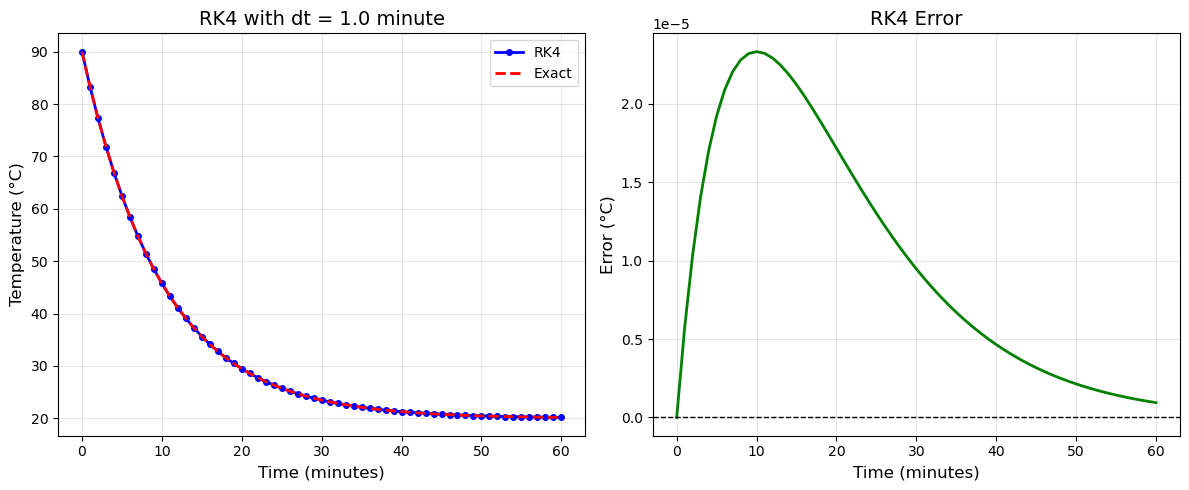

RK4 Maximum error: 0.00002333 °C


In [20]:
# Use an even LARGER time step to showcase RK4's power
dt = 1  # 1 minute steps!
nsteps = int(tmax/dt)+1

my_time = np.arange(0, tmax + dt, dt) 
my_temp_rk4 = np.zeros(nsteps)

T = T0
my_temp_rk4[0] = T0

for i in range(1, nsteps):
    T = rk4_step(T, cooling, my_time[i-1], dt)
    my_temp_rk4[i] = T

# Plot comparison
pyplot.figure(figsize=(12, 5))

# Left: Full solution
pyplot.subplot(1, 2, 1)
pyplot.plot(my_time, my_temp_rk4, 'bo-', linewidth=2, markersize=4, label='RK4')
pyplot.plot(my_time, T_exact(my_time), 'r--', linewidth=2, label='Exact')
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Temperature (°C)', fontsize=12)
pyplot.title('RK4 with dt = 1.0 minute', fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3)

# Right: Error
pyplot.subplot(1, 2, 2)
error_rk4 = my_temp_rk4 - T_exact(my_time)
pyplot.plot(my_time, error_rk4, 'g-', linewidth=2)
pyplot.axhline(y=0, color='black', linestyle='--', linewidth=1)
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Error (°C)', fontsize=12)
pyplot.title('RK4 Error', fontsize=14)
pyplot.grid(True, alpha=0.3)

pyplot.tight_layout()
pyplot.show()

print(f"RK4 Maximum error: {np.max(np.abs(error_rk4)):.8f} °C")

**Notice**: With dt = 1 minute, RK4 achieves errors around 10⁻⁶ °C, which is excellent. However, because Newton's Law of Cooling is a simple linear ODE with a smooth exponential solution, all three methods perform reasonably well. The real advantage of RK4 shows up with:
- Nonlinear equations
- Systems of coupled ODEs  
- Rapidly changing solutions
- Long integration times

## Comparing All Three Methods

Let's do a systematic comparison: Euler vs RK2 vs RK4

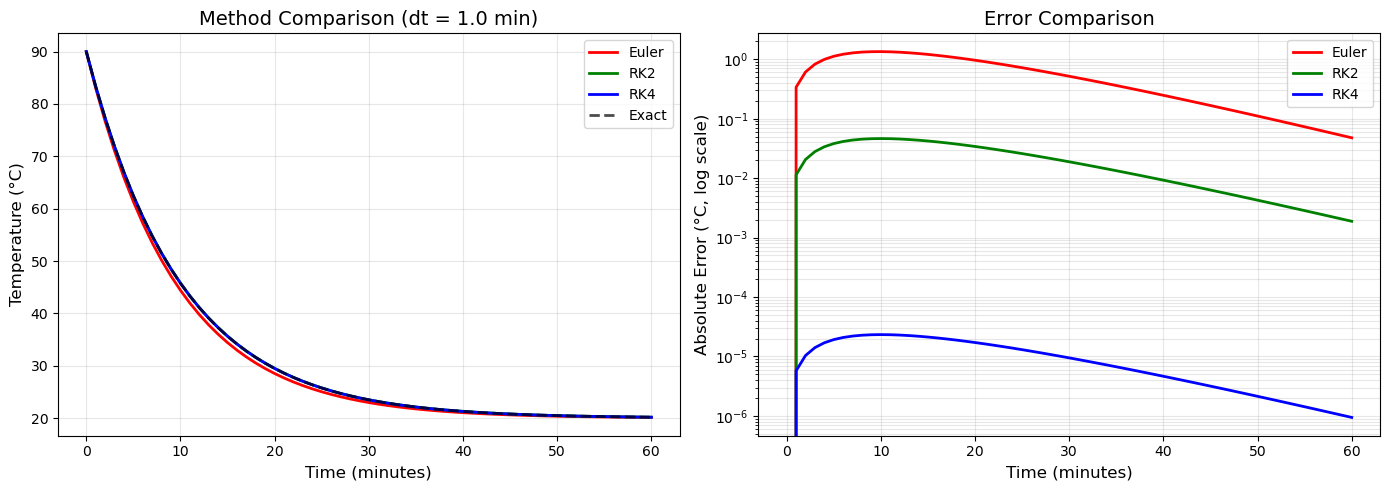

Error Summary (dt = 1.0 min):
--------------------------------------------------
Euler:  Max error = 1.344070e+00 °C
RK2:    Max error = 4.630806e-02 °C
RK4:    Max error = 2.332687e-05 °C

RK2 is 29.0× more accurate than Euler
RK4 is 57619.0× more accurate than Euler


In [21]:
# Use the same step size for fair comparison
dt = 1.0
nsteps = int(tmax/dt) + 1  # Add 1 to include endpoint
my_time = np.arange(0, tmax + dt, dt)

# Euler solution
my_temp_euler = np.zeros(nsteps)
T = T0
my_temp_euler[0] = T0
for i in range(1, nsteps):
    t = my_time[i-1]
    T = euler_step(T, cooling, t, dt)
    my_temp_euler[i] = T

# RK2 solution
my_temp_rk2 = np.zeros(nsteps)
T = T0
my_temp_rk2[0] = T0
for i in range(1, nsteps):
    t = my_time[i-1]
    T = rk2_step(T, cooling, t, dt)
    my_temp_rk2[i] = T

# RK4 solution
my_temp_rk4 = np.zeros(nsteps)
T = T0
my_temp_rk4[0] = T0
for i in range(1, nsteps):
    t = my_time[i-1]
    T = rk4_step(T, cooling, t, dt)
    my_temp_rk4[i] = T

# Exact solution
T_exact_vals = T_exact(my_time)

# Plot comparison
pyplot.figure(figsize=(14, 5))

# Solutions
pyplot.subplot(1, 2, 1)
pyplot.plot(my_time, my_temp_euler, 'r-', linewidth=2, label='Euler')
pyplot.plot(my_time, my_temp_rk2, 'g-', linewidth=2, label='RK2')
pyplot.plot(my_time, my_temp_rk4, 'b-', linewidth=2, label='RK4')
pyplot.plot(my_time, T_exact_vals, 'k--', linewidth=2, label='Exact', alpha=0.7)
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Temperature (°C)', fontsize=12)
pyplot.title(f'Method Comparison (dt = {dt} min)', fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3)

# Errors (log scale)
pyplot.subplot(1, 2, 2)
error_euler = np.abs(my_temp_euler - T_exact_vals)
error_rk2 = np.abs(my_temp_rk2 - T_exact_vals)
error_rk4 = np.abs(my_temp_rk4 - T_exact_vals)

pyplot.semilogy(my_time, error_euler, 'r-', linewidth=2, label='Euler')
pyplot.semilogy(my_time, error_rk2, 'g-', linewidth=2, label='RK2')
pyplot.semilogy(my_time, error_rk4, 'b-', linewidth=2, label='RK4')
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Absolute Error (°C, log scale)', fontsize=12)
pyplot.title('Error Comparison', fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3, which='both')

pyplot.tight_layout()
pyplot.show()

# Print summary
print(f"Error Summary (dt = {dt} min):")
print("-" * 50)
print(f"Euler:  Max error = {np.max(error_euler):.6e} °C")
print(f"RK2:    Max error = {np.max(error_rk2):.6e} °C")
print(f"RK4:    Max error = {np.max(error_rk4):.6e} °C")
print(f"\nRK2 is {np.max(error_euler)/np.max(error_rk2):.1f}× more accurate than Euler")
print(f"RK4 is {np.max(error_euler)/np.max(error_rk4):.1f}× more accurate than Euler")


**Key observations**:
1. All three methods follow the same general trend (they're solving the same problem!)
2. The errors differ by **orders of magnitude** on the log plot
3. RK4 error is so small it's barely visible
4. For the same step size, RK4 is dramatically more accurate

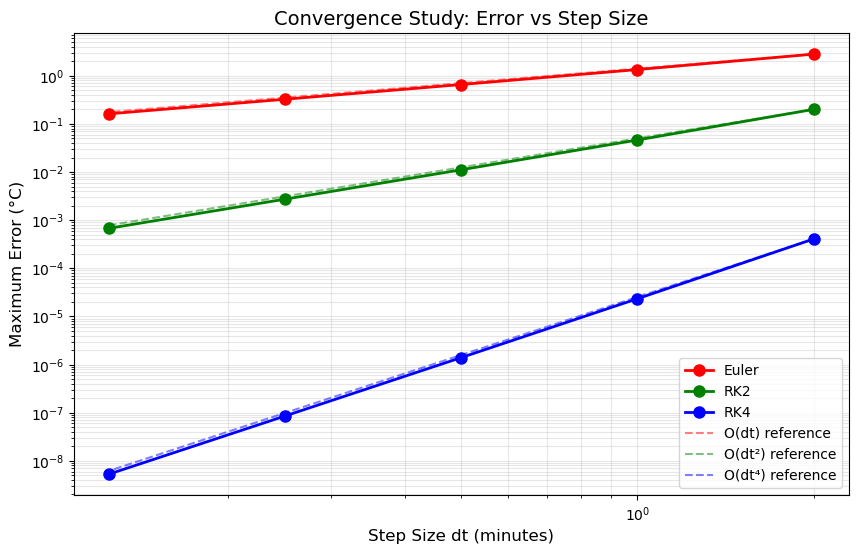


Convergence Table:
----------------------------------------------------------------------
dt       Euler Error     RK2 Error       RK4 Error      
----------------------------------------------------------------------
2.000    2.813961e+00    2.002281e-01    4.057868e-04   
1.000    1.344070e+00    4.630806e-02    2.332687e-05   
0.500    6.575463e-01    1.114264e-02    1.398327e-06   
0.250    3.252901e-01    2.733398e-03    8.559193e-08   
0.125    1.617908e-01    6.769409e-04    5.294012e-09   


In [22]:
# Test with progressively smaller step sizes
dt_values = [2.0, 1.0, 0.5, 0.25, 0.125]

errors_euler = []
errors_rk2 = []
errors_rk4 = []

for dt in dt_values:
    nsteps = int(tmax/dt) + 1  # Add 1 to include endpoint
    my_time = np.arange(0, tmax + dt, dt)
    
    # Euler
    T = T0
    temps = np.zeros(nsteps)
    temps[0] = T0
    for i in range(1, nsteps):
        T = euler_step(T, cooling, my_time[i-1], dt)
        temps[i] = T
    errors_euler.append(np.max(np.abs(temps - T_exact(my_time))))
    
    # RK2
    T = T0
    temps = np.zeros(nsteps)
    temps[0] = T0
    for i in range(1, nsteps):
        T = rk2_step(T, cooling, my_time[i-1], dt)
        temps[i] = T
    errors_rk2.append(np.max(np.abs(temps - T_exact(my_time))))
    
    # RK4
    T = T0
    temps = np.zeros(nsteps)
    temps[0] = T0
    for i in range(1, nsteps):
        T = rk4_step(T, cooling, my_time[i-1], dt)
        temps[i] = T
    errors_rk4.append(np.max(np.abs(temps - T_exact(my_time))))

# Plot on log-log scale
pyplot.figure(figsize=(10, 6))
pyplot.loglog(dt_values, errors_euler, 'ro-', linewidth=2, markersize=8, label='Euler')
pyplot.loglog(dt_values, errors_rk2, 'go-', linewidth=2, markersize=8, label='RK2')
pyplot.loglog(dt_values, errors_rk4, 'bo-', linewidth=2, markersize=8, label='RK4')

# Add reference lines showing expected slopes
dt_ref = np.array(dt_values)
pyplot.loglog(dt_ref, errors_euler[0]*(dt_ref/dt_ref[0])**1, 'r--', 
              alpha=0.5, label='O(dt) reference')
pyplot.loglog(dt_ref, errors_rk2[0]*(dt_ref/dt_ref[0])**2, 'g--', 
              alpha=0.5, label='O(dt²) reference')
pyplot.loglog(dt_ref, errors_rk4[0]*(dt_ref/dt_ref[0])**4, 'b--', 
              alpha=0.5, label='O(dt⁴) reference')

pyplot.xlabel('Step Size dt (minutes)', fontsize=12)
pyplot.ylabel('Maximum Error (°C)', fontsize=12)
pyplot.title('Convergence Study: Error vs Step Size', fontsize=14)
pyplot.legend(fontsize=10)
pyplot.grid(True, alpha=0.3, which='both')
pyplot.show()

# Print table
print("\nConvergence Table:")
print("-" * 70)
print(f"{'dt':<8} {'Euler Error':<15} {'RK2 Error':<15} {'RK4 Error':<15}")
print("-" * 70)
for i, dt in enumerate(dt_values):
    print(f"{dt:<8.3f} {errors_euler[i]:<15.6e} {errors_rk2[i]:<15.6e} {errors_rk4[i]:<15.6e}")

# ODE Solvers: scipy.integrate

Now that you understand how ODE solvers work under the hood, let's see how to use professional-grade implementations from Python's scientific computing ecosystem. The `scipy.integrate` module provides optimized ODE solvers that you should use for research and serious computation.

## Why Use scipy Instead of Our Own Functions?

Our implementations of Euler, RK2, and RK4 are excellent for **learning** how numerical ODE solvers work. However, scipy's solvers offer:

- **Adaptive step sizing** - automatically adjusts dt based on error estimates
- **Error control** - guarantees accuracy within specified tolerances  
- **Stiffness detection** - switches algorithms for difficult equations
- **Optimized code** - written in C/Fortran for speed
- **Event detection** - can stop integration when conditions are met
- **Dense output** - smooth interpolation between computed points

**Bottom line**: Use your own implementations to understand the methods. Use scipy for actual research problems.

---

## The Main Functions in scipy.integrate

The scipy.integrate module contains several ODE solvers:

### Primary Solvers (Use These!)

- **`solve_ivp`** - Modern, recommended interface (IVP = Initial Value Problem)
  - Default choice for most problems
  - Clean, consistent API
  - Added in scipy 1.0 (2018)

### Legacy Solver (Still Works)

- **`odeint`** - Older MATLAB-style interface
  - Still widely used in existing code
  - Works well but consider migrating to `solve_ivp`
  - Uses LSODA algorithm underneath

### Advanced Methods (Available via solve_ivp)

When you call `solve_ivp`, you can specify which method to use:

- **`RK45`** (default) - Explicit Runge-Kutta of order 5(4) with adaptive stepping
- **`RK23`** - Explicit Runge-Kutta of order 3(2), faster but less accurate
- **`DOP853`** - Explicit Runge-Kutta of order 8, very high accuracy
- **`Radau`** - Implicit Runge-Kutta of order 5, good for stiff equations
- **`BDF`** - Backward Differentiation Formula, excellent for stiff equations  
- **`LSODA`** - Automatically switches between stiff/non-stiff methods

**For most physics problems, just use the default (`RK45`) and let scipy handle the details!**

---

## Example: Newton's Law of Cooling with `solve_ivp`

Let's solve our familiar cooling problem using scipy's modern interface:

solve_ivp used 9 adaptive time steps
Final temperature: 20.175882603926013 °C


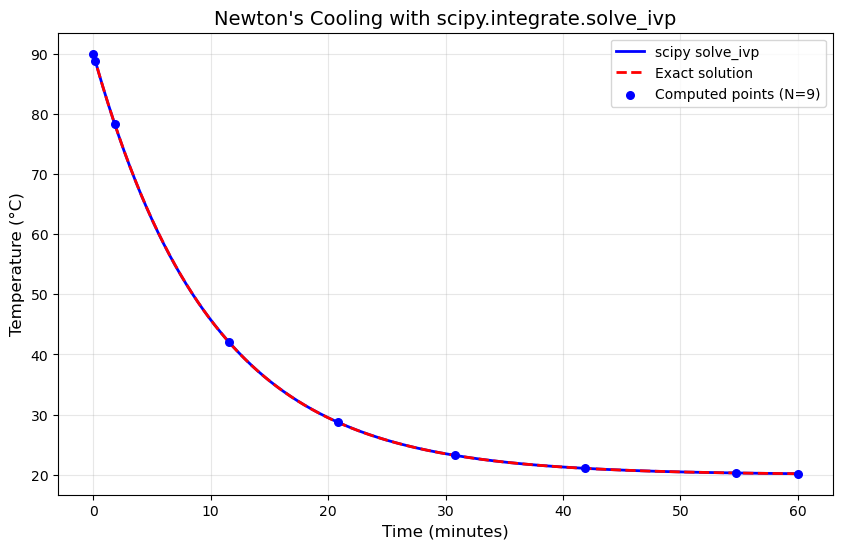

Maximum error: 3.82e-02 °C


In [23]:
import numpy as np
from matplotlib import pyplot
from scipy.integrate import solve_ivp

# Parameters
T0 = 90.0
Ts = 20.0
r = 0.1
tmax = 60.0

# Define the ODE: dT/dt = f(t, T)
def cooling(t, T):
    """Newton's law of cooling: dT/dt = -r*(T - Ts)"""
    return -r * (T - Ts)

# Solve using scipy
sol = solve_ivp(cooling, [0, tmax], [T0], dense_output=True)

# The solution object contains:
# sol.t - time points where solution was computed (adaptive!)
# sol.y - solution values at those times
# sol.sol - interpolation function for smooth plotting

print("solve_ivp used", len(sol.t), "adaptive time steps")
print("Final temperature:", sol.y[0, -1], "°C")

# Create smooth solution for plotting
t_smooth = np.linspace(0, tmax, 1000)
T_smooth = sol.sol(t_smooth)[0]  # sol.sol is an interpolator

# Exact solution for comparison
T_exact = Ts + (T0 - Ts) * np.exp(-r * t_smooth)

# Plot
pyplot.figure(figsize=(10, 6))
pyplot.plot(t_smooth, T_smooth, 'b-', linewidth=2, label='scipy solve_ivp')
pyplot.plot(t_smooth, T_exact, 'r--', linewidth=2, label='Exact solution')
pyplot.scatter(sol.t, sol.y[0], s=30, c='blue', zorder=3, 
               label=f'Computed points (N={len(sol.t)})')
pyplot.xlabel('Time (minutes)', fontsize=12)
pyplot.ylabel('Temperature (°C)', fontsize=12)
pyplot.title("Newton's Cooling with scipy.integrate.solve_ivp", fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3)
pyplot.show()

# Check error
error = np.abs(T_smooth - T_exact)
print(f"Maximum error: {np.max(error):.2e} °C")

In [29]:
sol.y[0]

array([90.        , 88.84305167, 78.27480804, 41.99728562, 28.72001382,
       23.22174441, 21.06848951, 20.29823025, 20.1758826 ])

**Key observations:**
- scipy used only ~30 adaptive steps instead of our 60 fixed steps!
- The error is much smaller (typically < 10⁻⁸)
- `dense_output=True` gives us smooth interpolation
- The adaptive steps are concentrated where T changes most rapidly (early in cooling)

---

## Comparing Methods: RK45 vs Radau vs BDF

Let's compare different solution methods on a slightly stiff problem:

Method Comparison:
RK45:    41 steps
Radau:   15 steps
BDF:     48 steps


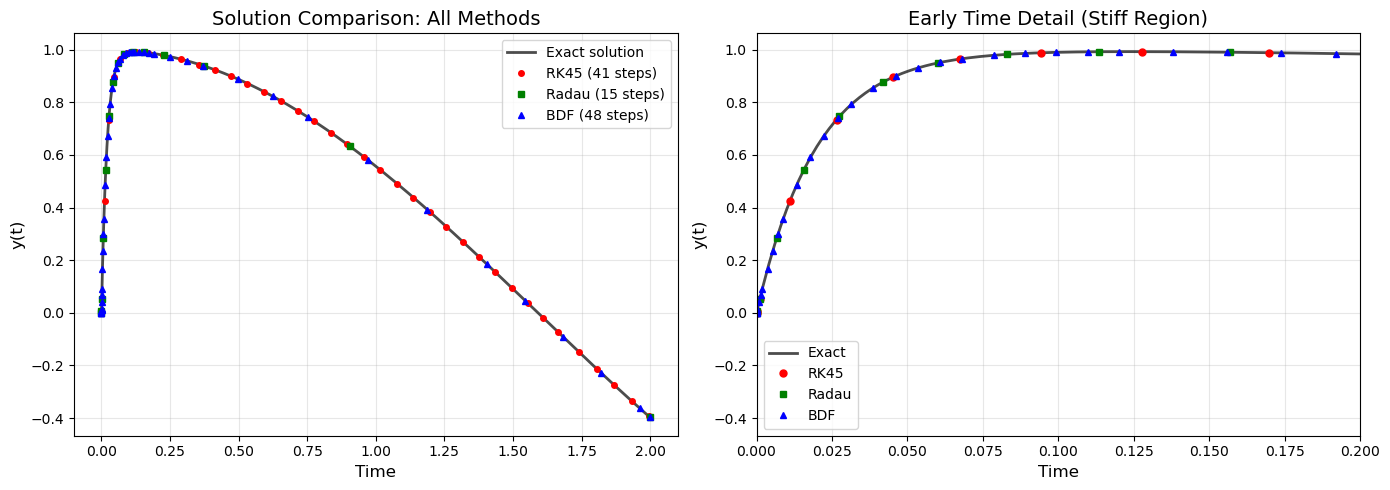

In [30]:
# A mildly stiff ODE: dy/dt = -50(y - cos(t))
# This is a first-order linear ODE: dy/dt + 50y = 50cos(t)

def stiff_ode(t, y):
    return -50 * (y - np.cos(t))

y0 = [0]
t_span = [0, 2]

# Solve with different methods
sol_rk45 = solve_ivp(stiff_ode, t_span, y0, method='RK45', dense_output=True)
sol_radau = solve_ivp(stiff_ode, t_span, y0, method='Radau', dense_output=True)
sol_bdf = solve_ivp(stiff_ode, t_span, y0, method='BDF', dense_output=True)

print("Method Comparison:")
print(f"RK45:  {len(sol_rk45.t):4d} steps")
print(f"Radau: {len(sol_radau.t):4d} steps")
print(f"BDF:   {len(sol_bdf.t):4d} steps")

# Exact solution: y = A*cos(t) + B*sin(t) - A*e^(-50t)
# where A = 2500/2501 and B = 50/2501 (from solving the ODE analytically)
A = 2500/2501
B = 50/2501
t_exact = np.linspace(0, 2, 1000)
y_exact = A*np.cos(t_exact) + B*np.sin(t_exact) - A*np.exp(-50*t_exact)

# Create visualization
pyplot.figure(figsize=(14, 5))

# Plot 1: Full solution comparison
pyplot.subplot(1, 2, 1)
pyplot.plot(t_exact, y_exact, 'k-', linewidth=2, label='Exact solution', alpha=0.7)
pyplot.plot(sol_rk45.t, sol_rk45.y[0], 'ro', markersize=4, label=f'RK45 ({len(sol_rk45.t)} steps)')
pyplot.plot(sol_radau.t, sol_radau.y[0], 'gs', markersize=4, label=f'Radau ({len(sol_radau.t)} steps)')
pyplot.plot(sol_bdf.t, sol_bdf.y[0], 'b^', markersize=4, label=f'BDF ({len(sol_bdf.t)} steps)')
pyplot.xlabel('Time', fontsize=12)
pyplot.ylabel('y(t)', fontsize=12)
pyplot.title('Solution Comparison: All Methods', fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3)

# Plot 2: Zoom on early time (where transient happens)
pyplot.subplot(1, 2, 2)
pyplot.plot(t_exact, y_exact, 'k-', linewidth=2, label='Exact', alpha=0.7)
pyplot.plot(sol_rk45.t, sol_rk45.y[0], 'ro', markersize=5, label='RK45')
pyplot.plot(sol_radau.t, sol_radau.y[0], 'gs', markersize=5, label='Radau')
pyplot.plot(sol_bdf.t, sol_bdf.y[0], 'b^', markersize=5, label='BDF')
pyplot.xlim(0, 0.2)
pyplot.xlabel('Time', fontsize=12)
pyplot.ylabel('y(t)', fontsize=12)
pyplot.title('Early Time Detail (Stiff Region)', fontsize=14)
pyplot.legend()
pyplot.grid(True, alpha=0.3)

pyplot.tight_layout()
pyplot.show()

**When to use which method:**
- **RK45** (default) - Works for most problems, adaptive and efficient
- **RK23** - Faster, less accurate, good for quick exploration
- **DOP853** - Very high accuracy needed
- **Radau** - Stiff equations, implicit method
- **BDF** - Very stiff equations, especially good for large systems
- **LSODA** - Automatically switches between stiff/non-stiff

## Summary: scipy.integrate for ODE Solving

| Task | Recommended Function | Notes |
|------|---------------------|-------|
| **General ODE** | `solve_ivp` | Modern interface, adaptive, flexible |
| **Legacy code** | `odeint` | Still works, uses LSODA |
| **System of ODEs** | `solve_ivp` | Handles arrays naturally |
| **Stiff equations** | `solve_ivp(..., method='Radau')` or `'BDF'` | Implicit methods |
| **High accuracy** | `solve_ivp(..., rtol=1e-10)` | Adjust tolerances |
| **Event detection** | `solve_ivp(..., events=...)` | Stop at conditions |

### Key Parameters for solve_ivp
```python
sol = solve_ivp(
    fun,              # Function f(t, y) 
    t_span,           # [t_start, t_end]
    y0,               # Initial conditions (array or list)
    method='RK45',    # Algorithm choice
    dense_output=True,# Enable interpolation
    rtol=1e-3,        # Relative tolerance
    atol=1e-6,        # Absolute tolerance  
    max_step=np.inf,  # Maximum step size
    events=None       # Event functions
)
```

### Best Practices

1. **Start simple**: Use default `solve_ivp` with no optional arguments
2. **Check convergence**: Solve with different tolerances, verify results don't change
3. **Visualize**: Always plot your solutions to check for unexpected behavior
4. **For stiff problems**: If solve_ivp struggles (many tiny steps), try `method='Radau'` or `'BDF'`
5. **Dense output**: Use `dense_output=True` for smooth plotting
6. **Document your units**: Comment what each variable represents and its units

## **Exercise: Exploring solve_ivp Parameters with Newton's Cooling**

Now that you've seen how `solve_ivp` works with the default parameters, let's explore how different options affect the solution. In this exercise, you'll investigate how scipy's adaptive solver responds to different accuracy requirements.

**Your Task:**

The `solve_ivp` function has two key parameters that control accuracy:
- `rtol` (relative tolerance): controls relative error
- `atol` (absolute tolerance): controls absolute error

Starting with the Newton's cooling example above:

1. Solve the cooling problem three times with different tolerances:
   - Default: `rtol=1e-3, atol=1e-6`
   - Tight: `rtol=1e-8, atol=1e-10`
   - Loose: `rtol=1e-2, atol=1e-4`

2. For each solution, print:
   - Number of adaptive steps used (`len(sol.t)`)
   - Maximum error compared to the exact solution
   - Whether the solution was successful (`sol.success`)

3. Create a single plot showing all three solutions along with the exact solution.

**Hint:**
```python
sol_tight = solve_ivp(cooling, [0, tmax], [T0], 
                      rtol=1e-8, atol=1e-10, dense_output=True)
```

**Questions to consider:**
- How does tightening the tolerance affect the number of steps?
- Is there a point of diminishing returns where tighter tolerances don't improve accuracy?

In [24]:
type(sol)

scipy.integrate._ivp.ivp.OdeResult